<a href="https://colab.research.google.com/github/nicoloceneda/Python-edu/blob/master/TensorFlow_Dataset_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow - Dataset API

---



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

## Creating a dataset
Create a dataset from a **list**, a **Numpy array** or a **tensor** using `tf.data.Dataset.from_tensor_slices`

In [0]:
a = [1, 2, 3]
dataset_a = tf.data.Dataset.from_tensor_slices(a)
print(dataset_a)

b = np.array([4, 5, 6])
dataset_b = tf.data.Dataset.from_tensor_slices(b)
print(dataset_b)

c = tf.constant([7, 8, 9])
dataset_c = tf.data.Dataset.from_tensor_slices(c)
print(dataset_c)

<TensorSliceDataset shapes: (), types: tf.int32>
<TensorSliceDataset shapes: (), types: tf.int64>
<TensorSliceDataset shapes: (), types: tf.int32>


## Iterating through a dataset
Iterate **entry by entry** through a dataset using `for ... in`

In [0]:
a = [1, 2, 3]
dataset_a = tf.data.Dataset.from_tensor_slices(a)

for pos, item in enumerate(dataset_a):
  print('item {}'.format(pos), item)

item 0 tf.Tensor(1, shape=(), dtype=int32)
item 1 tf.Tensor(2, shape=(), dtype=int32)
item 2 tf.Tensor(3, shape=(), dtype=int32)


## Combining two tensors into a joint dataset
Create a **joint dataset** (to create a one-to-one correspondence between the elements of two tensors) using `tf.data.Dataset.zip` or `tf.data.Dataset.from_tensor_slices`


In [0]:
# First create two separate datasets, then join them (zip)
tensor_a = tf.random.uniform(shape=(4, 2), minval=0, maxval=1, dtype=tf.float64)
dataset_a = tf.data.Dataset.from_tensor_slices(tensor_a)

tensor_b = tf.random.uniform(shape=(4, ), minval=0, maxval=10, dtype=tf.int64)
dataset_b = tf.data.Dataset.from_tensor_slices(tensor_b)

dataset_c = tf.data.Dataset.zip((dataset_a, dataset_b))

for item in dataset_c:
  print('x:', item[0].numpy(), 'y:', item[1].numpy())

x: [0.96985216 0.75988859] y: 0
x: [0.81050961 0.45757526] y: 8
x: [0.9127962  0.75371072] y: 3
x: [0.81402251 0.4272198 ] y: 3


In [0]:
# Directly create a joint dataset (from_tensor_slices)
tensor_a = tf.random.uniform(shape=(4, 2), minval=0, maxval=1, dtype=tf.float64)
tensor_b = tf.random.uniform(shape=(4, ), minval=0, maxval=10, dtype=tf.int64)

dataset_c = tf.data.Dataset.from_tensor_slices((tensor_a, tensor_b))

for item in dataset_c:
  print('x:', item[0].numpy(), 'y:', item[1].numpy())

x: [0.78171521 0.19035466] y: 0
x: [0.0664793  0.43959009] y: 1
x: [0.08275566 0.18065258] y: 0
x: [0.59546455 0.99160054] y: 4


Apply **feature scaling** to scale the values to the range [-1, +1] using `map`



In [0]:
tensor_a = tf.random.uniform(shape=(4, 2), minval=0, maxval=1, dtype=tf.float64)
tensor_b = tf.random.uniform(shape=(4, ), minval=0, maxval=10, dtype=tf.int64)

dataset_c = tf.data.Dataset.from_tensor_slices((tensor_a, tensor_b))

dataset_c2 = dataset_c.map(lambda x, y: (x*2 - 1.0, y))

for item in dataset_c2:
  print('x:', item[0].numpy(), 'y:', item[1].numpy())

x: [ 0.22946583 -0.9972768 ] y: 3
x: [0.08877882 0.90430657] y: 2
x: [ 0.33940236 -0.59089703] y: 5
x: [-0.13124375  0.5426809 ] y: 8


## Shuffling the dataset, creating batches and repeating
**Shuffle** the elements of a dataset (keeping the one-to-one correspondence between the elements of the two tensors) using `shuffle`


In [0]:
tensor_a = tf.random.uniform(shape=(4, 2), minval=0, maxval=1, dtype=tf.float64)
tensor_b = tf.random.uniform(shape=(4, ), minval=0, maxval=10, dtype=tf.int64)

dataset_c = tf.data.Dataset.from_tensor_slices((tensor_a, tensor_b))

for item in dataset_c:
  print('x:', item[0].numpy(), 'y:', item[1].numpy())

print('-'*32)

dataset_c2 = dataset_c.shuffle(buffer_size=len(tensor_b))

for item in dataset_c2:
  print('x:', item[0].numpy(), 'y:', item[1].numpy())

x: [0.29464301 0.96874203] y: 7
x: [0.6388146  0.47713994] y: 4
x: [0.66656143 0.87581707] y: 0
x: [0.67103885 0.69502945] y: 1
--------------------------------
x: [0.67103885 0.69502945] y: 1
x: [0.29464301 0.96874203] y: 7
x: [0.6388146  0.47713994] y: 4
x: [0.66656143 0.87581707] y: 0


Create **batches** from a dataset using `batch`


In [0]:
tensor_a = tf.random.uniform(shape=(4, 2), minval=0, maxval=1, dtype=tf.float64)
tensor_b = tf.random.uniform(shape=(4, ), minval=0, maxval=10, dtype=tf.int64)

dataset_c = tf.data.Dataset.from_tensor_slices((tensor_a, tensor_b))

for item in dataset_c:
  print('x:', item[0].numpy(), 'y:', item[1].numpy())

print('-'*42)

dataset_d = dataset_c.batch(batch_size=2)

for pos, batch in enumerate(dataset_d):
  print('{}) X:\n'.format(pos), batch[0].numpy(), '\n   Y:\n', batch[1].numpy())



x: [0.22052963 0.69238093] y: 6
x: [0.75565791 0.19530456] y: 7
x: [0.3935238  0.52977417] y: 1
x: [0.94437602 0.90580297] y: 8
------------------------------------------
0) X:
 [[0.22052963 0.69238093]
 [0.75565791 0.19530456]] 
   Y:
 [6 7]
1) X:
 [[0.3935238  0.52977417]
 [0.94437602 0.90580297]] 
   Y:
 [1 8]


**Repeat** the operations using `repeat`






In [0]:
tensor_a = tf.random.uniform(shape=(4, 2), minval=0, maxval=1, dtype=tf.float64)
tensor_b = tf.random.uniform(shape=(4, ), minval=0, maxval=10, dtype=tf.int64)

dataset_c = tf.data.Dataset.from_tensor_slices((tensor_a, tensor_b))

for item in dataset_c:
  print('x:', item[0].numpy(), 'y:', item[1].numpy())

print('-'*42)

dataset_d = dataset_c.shuffle(buffer_size=len(tensor_b)).batch(batch_size=2).repeat(count=2)

for pos, batch in enumerate(dataset_d):
  print('{}) X:\n'.format(pos), batch[0].numpy(), '\n   Y:\n', batch[1].numpy())

x: [0.80451993 0.05432703] y: 7
x: [0.08385523 0.39924724] y: 7
x: [0.60273752 0.44267349] y: 8
x: [0.58375675 0.64127321] y: 0
------------------------------------------
0) X:
 [[0.58375675 0.64127321]
 [0.60273752 0.44267349]] 
   Y:
 [0 8]
1) X:
 [[0.80451993 0.05432703]
 [0.08385523 0.39924724]] 
   Y:
 [7 7]
2) X:
 [[0.60273752 0.44267349]
 [0.58375675 0.64127321]] 
   Y:
 [8 0]
3) X:
 [[0.08385523 0.39924724]
 [0.80451993 0.05432703]] 
   Y:
 [7 7]


## Fetching available datasets from the tensorflow_datasets library
A **collection of datasets** for training and evaluation of deep learning models is available through the `tensorflow_datasets` library. These datasets are ready to use as `tf.data.Dataset` objects, which means that all the functions introduced above apply. Moreover, they come with informative descriptions, such as the type and dimensionality of features and labels, and the citation in BibTex format of the original paper.


In [0]:
print('Number of datasets:', len(tfds.list_builders()))
print('List of the first three datasets:', tfds.list_builders()[:3])

Number of datasets: 155
List of the first three datasets: ['abstract_reasoning', 'aeslc', 'aflw2k3d']


**Fetch a dataset** (Mnist) using `tfds.load`



In [0]:
mnist, mnist_info = tfds.load('mnist', with_info=True, shuffle_files=False)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


**Explore the dataset** 

In [0]:
print(mnist.keys())

print('-'*30)

print(mnist_info)

dict_keys(['test', 'train'])
------------------------------
tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



**Apply a transformation** to the train subset to convert the elements from a dictionary to a tuple

In [0]:
ds_train = mnist['train']
ds_train = ds_train.map(lambda item: (item['image'], item['label']))

print(ds_train)

<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


**Create batches**

In [0]:
ds_train = ds_train.batch(batch_size=10)
batch = next(iter(ds_train))

print(batch[0].shape, batch[1])

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


**Visualize** 10 examples.

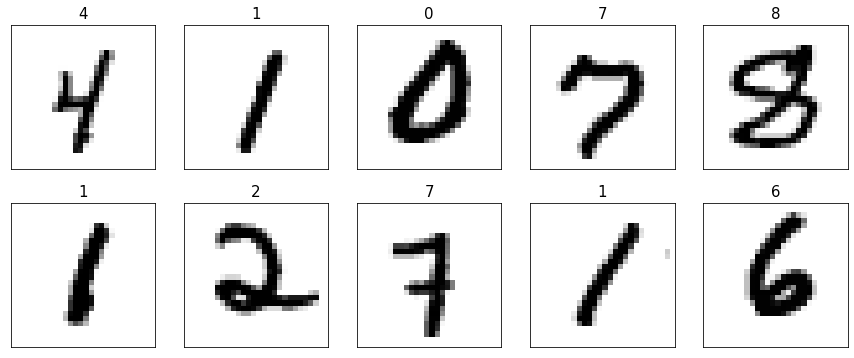

In [0]:
fig = plt.figure(figsize=(15, 6))

for i,(image,label) in enumerate(zip(batch[0], batch[1])):
  ax = fig.add_subplot(2, 5, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(image[:, :, 0], cmap='gray_r')
  ax.set_title('{}'.format(label), size=15)

plt.show()